In [1]:
import pandas as pd
from IPython.display import HTML

# Практика N4 "Решение задач дискретной оптимизации".
## **Цель работы**:
•	Ознакомиться с основами дискретной оптимизации и ее отличиями от непрерывной.<br>
•	Научиться моделировать и решать задачи дискретной оптимизации (в частности, задачу о рюкзаке) с использованием Python.<br>
•	Получить практический опыт применения методов дискретной оптимизации для принятия решений в условиях ограниченных ресурсов, что актуально для инновационного менеджмента.<br>
•	Развить навыки анализа полученных решений.<br>

## **Введение:**
В сфере инноватики часто возникают ситуации, когда необходимо принимать решения о выборе из конечного набора вариантов (проектов, технологий, ресурсов), каждый из которых обладает определенной “ценностью” (прибылью, полезностью) и “стоимостью” (временем, деньгами, трудозатратами). При этом общий доступный ресурс (бюджет, время) ограничен. Задача заключается в том, чтобы выбрать такой набор вариантов, который максимизирует общую “ценность”, не превышая при этом доступный ресурс. Такая задача относится к классу задач дискретной оптимизации.<br>
Одной из классических задач дискретной оптимизации является задача о рюкзаке (Knapsack Problem). Представьте, что у вас есть рюкзак с ограниченной вместимостью (вес или объем) и набор предметов, каждый из которых имеет свой вес и ценность. Вам нужно выбрать такие предметы, чтобы поместить их в рюкзак, максимизировав общую ценность, при этом не превысив его вместимость.<br>
В нашей практической работе мы адаптируем задачу о рюкзаке для моделирования оптимального распределения инвестиций в портфель инновационных проектов.<br>
## **Постановка задачи:**
Представьте, что у вас есть ограниченный инвестиционный бюджет B (например, $100,000). Вам предстоит выбрать из списка потенциальных инновационных проектов, каждый из которых имеет:<br>
•	Необходимый объем инвестиций (стоимость)<br>
•	Ожидаемую прибыль (ценность)<br>
Ваша цель – выбрать такой набор проектов, чтобы максимизировать суммарную ожидаемую прибыль, при этом суммарные инвестиции не должны превышать бюджет B.<br>
### Пример данных:


In [2]:

from IPython.display import HTML
html_content = """
<table>   <thead> <tr><th>Проект (№)</th><th>	Необходимый объем инвестиций ($)</th><th>	Ожидаемая прибыль ($)</th></tr>
  </thead>     <tbody> <tr><td>1</td><td>	30,000</td><td>	40,000</td></tr> <tr><td>2</td><td>	20,000</td><td>	25,000</td></tr> <tr><td>3</td><td>	50,000</td><td>	60,000</td></tr> <tr><td>4</td><td>	10,000</td><td>	12,000</td></tr> <tr><td>5</td><td>	40,000</td><td>	50,000</td></tr> <tr><td>6</td><td>	25,000</td><td>	30,000</td></tr>
  </tbody>
</table>
"""
display(HTML(html_content))

Проект (№),Необходимый объем инвестиций ($),Ожидаемая прибыль ($)
1,"30,000","40,000"
2,"20,000","25,000"
3,"50,000","60,000"
4,"10,000","12,000"
5,"40,000","50,000"
6,"25,000","30,000"


### **Общий бюджет (B) = $100,000
### Требования к выполнению:
**
#### 1.	Импорт необходимых библиотек:
* **numpy** для работы с массивами.
* **scipy.optimize** для решения задач оптимизации. В частности, для дискретной оптимизации мы будем использовать функцию **milp (Mixed-Integer Linear Programming)** или, в более простом случае, для бинарной задачи о рюкзаке, можем использовать **linear_sum_assignment** с некоторыми модификациями, или даже реализовать более простой алгоритм (например, жадный). Для данной работы рекомендуется использовать **scipy.optimize.milp**, так как он наиболее универсален для задач целочисленного программирования.
#### 2.	Представление данных:
* Создайте списки или массивы **numpy** для хранения объемов инвестиций (**weights**) и ожидаемой прибыли (**values**) проектов.
* Задайте общий бюджет (**capacity**).
#### 3.	Постановка задачи в формате MILP (Mixed-Integer Linear Programming):
* Переменные решения: Введите бинарные переменные **x_i**, где **x_i = 1**, если проект **i** выбран, и **x_i = 0**, если проект **i** не выбран.
* Целевая функция: Максимизировать суммарную прибыль: **Maximize Sum(values[i] * x_i)** для всех **i**.
* Ограничение: Суммарные инвестиции не должны превышать бюджет: **Sum(weights[i] * x_i) <= capacity**.
* Ограничения на переменные: **x_i ∈ {0, 1}** (бинарные переменные).
#### 4.	Решение задачи с помощью scipy.optimize.milp:
* Используйте функцию **milp** для решения поставленной задачи.
* Важно: Функция **milp** по умолчанию ищет минимум. Поэтому целевую функцию нужно инвертировать: минимизировать **Sum(-values[i] * x_i)**.
* Укажите тип переменных (бинарные).
* Задайте ограничения.
#### 5.	Анализ и интерпретация результатов:
* Выведите список выбранных проектов (по их номерам).
* Выведите суммарную ожидаемую прибыль от выбранных проектов.
* Выведите суммарный объем инвестиций в выбранные проекты.
* Проанализируйте, насколько полно использован бюджет, и почему были выбраны именно эти проекты.
### Пример кода (базовый, с использованием milp):


In [3]:
import numpy as np
from scipy.optimize import milp, Bounds, LinearConstraint

# --- Данные задачи ---
# Необходимый объем инвестиций для каждого проекта
weights = np.array([30000, 20000, 50000, 10000, 40000, 25000])
# Ожидаемая прибыль от каждого проекта
values = np.array([40000, 25000, 60000, 12000, 50000, 30000])
# Общий бюджет
capacity = 100000

# Количество проектов
n_projects = len(weights)
# --- Постановка задачи MILP ---

# 1. Целевая функция: Минимизировать -Сумма(прибыль_i * x_i)
#    (что эквивалентно максимизации Сумма(прибыль_i * x_i))
c = -values

# 2. Ограничение на бюджет: Сумма(инвестиции_i * x_i) <= capacity
#    Для milp, ограничение должно быть в формате Ax <= b
#    В данном случае A = weights, b = capacity
A = [weights]
b = [capacity]
print(A)
linear_constraint = LinearConstraint(A, ub=b)
print(linear_constraint)
# 3. Ограничения на переменные: x_i должны быть бинарными (0 или 1)
#    scipy.optimize.milp работает с целочисленными переменными,
#    нужно указать тип для каждой переменной.
#    Для этого создаем массив integer_vars_type, где 0 - непрерывная, 1 - целочисленная, 2 - бинарная.
#    В нашем случае все переменные бинарные.
integrality = np.full(n_projects, 1) # 2 означает бинарная переменная

# --- Решение задачи ---
# Используем milp для решения задачи целочисленного линейного программирования.
# В данном случае это задача бинарного линейного программирования (один из видов целочисленного).
bounds = Bounds(lb=0, ub=1)
result = milp(c=c, constraints=linear_constraint, integrality=integrality,bounds=bounds)
print(result.x)
# --- Анализ и интерпретация результатов ---
print("--- Результаты оптимизации инвестиций в инновационные проекты ---")

if result.success:
    optimal_selection = result.x # Массив бинарных переменных (0 или 1)
    selected_projects_indices = np.where(optimal_selection == 1)[0]
    print('___',selected_projects_indices)
    total_profit = np.sum(values[selected_projects_indices])
    total_investment = np.sum(weights[selected_projects_indices])

    print(f"Выбранные проекты (индексы): {selected_projects_indices}")
    print("Детали выбранных проектов:")
    for idx in selected_projects_indices:
        print(f"  - Проект {idx+1}: Инвестиции = ${weights[idx]:,.0f}, Прибыль = ${values[idx]:,.0f}")

    print(f"\nОбщая ожидаемая прибыль: ${total_profit:,.0f}")
    print(f"Общий объем инвестиций: ${total_investment:,.0f}")
    print(f"Оставшийся бюджет: ${capacity - total_investment:,.0f}")
    print(f"Статус решения: {result.message}")
else:
    print(f"Задача оптимизации не была решена успешно: {result.message}")


[array([30000, 20000, 50000, 10000, 40000, 25000])]
[1. 1. 0. 1. 1. 0.]
--- Результаты оптимизации инвестиций в инновационные проекты ---
___ [0 1 3 4]
Выбранные проекты (индексы): [0 1 3 4]
Детали выбранных проектов:
  - Проект 1: Инвестиции = $30,000, Прибыль = $40,000
  - Проект 2: Инвестиции = $20,000, Прибыль = $25,000
  - Проект 4: Инвестиции = $10,000, Прибыль = $12,000
  - Проект 5: Инвестиции = $40,000, Прибыль = $50,000

Общая ожидаемая прибыль: $127,000
Общий объем инвестиций: $100,000
Оставшийся бюджет: $0
Статус решения: Optimization terminated successfully. (HiGHS Status 7: Optimal)


### Задача 1: Простой выбор проектов
Описание: У вас есть бюджет B=100000. Вам составит 5 проектов. Для каждого проекта сохраняется стоимость инвестиций и ожидаемая прибыль. Выберите такой набор проектов, чтобы совокупная прибыль была максимальной, а общие инвестиции не ограничивали бюджет.
### Данные:


In [4]:

from IPython.display import HTML
html_content = """
<table>   <thead> <tr><th>Проект (№)</th><th>	Стоимость инвестиций ($)</th><th>	Ожидаемая прибыль ($)</th></tr>
  </thead>     <tbody> <tr><td>0</td><td>	20,000</td><td>	30,000</td></tr> <tr><td>1</td><td>	30,000</td><td>	45,000</td></tr> <tr><td>2</td><td>	40,000</td><td>	55,000</td></tr> <tr><td>3</td><td>	50,000</td><td>	70,000</td></tr> <tr><td>4</td><td>	10,000</td><td>	15,000</td></tr>
  </tbody>
</table>
"""
display(HTML(html_content))


Проект (№),Стоимость инвестиций ($),Ожидаемая прибыль ($)
0,"20,000","30,000"
1,"30,000","45,000"
2,"40,000","55,000"
3,"50,000","70,000"
4,"10,000","15,000"


#### Бюджет (B): 100,000
#### Формулировка:

Пусть x_i– бинарная переменная, где x_i=1, если проект i выбран, и x_i=0, если проект i не выбран.

##### Максимизировать:
Z = 30,000*x_0 +  45,000*x_1 + 55,000*x_2 + 70,000*x_3 + 15,000*x_4
##### При ограничениях:
1.  Бюджет: 20,000*x_0 +  30,000*x_1 + 40,000*x_2 + 50,000*x_3 + 10,000*x_4 <=100,000
2.  Бинарность: x_i ∈ {0, 1}  для. i=0,1,2,3,4.

#### Решение по Python с SciPy:

In [5]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np

# --- Данные задачи 1 ---
costs = np.array([20000, 30000, 40000, 50000, 10000])
profits = np.array([30000, 45000, 55000, 70000, 15000])
budget = 100000

num_projects = len(costs)

# ...


#### Задача 2: Добавление приоритетов или минимальных требований
##### Описание: Аналогично первой задаче, но теперь у нас есть дополнительное условие: если мы выбираем проект 3 (самый дорогой, с высокой прибылью), мы должны также выбрать проект 4 (самый дешевый, но с низкой прибылью) из-за синергии или факторного значения. Или, наоборот, мы можем установить реальный уровень прибыли, который должен достичь 80,000.

##### Данные: Те же, что и в Задаче 1. Бюджет (B): 100,000

Формулировка:

Пусть x_i– бинарная переменная.

##### Максимизировать:
Z = 30,000*x_0 +  45,000*x_1 + 55,000*x_2 + 70,000*x_3 + 15,000*x_4
##### При ограничениях:
1.  Бюджет: 20,000*x_0 +  30,000*x_1 + 40,000*x_2 + 50,000*x_3 + 10,000*x_4 <=100,000
2.  Условие синергии (Проект 3 -> Проект 4): Если x_3 = 1, то x_4 = 1. Это можно как записать: x_3 <= x_4. Или, более формально, x_3 - x_4 <= 0.
3.  Минимальная общая прибыль (альтернативное условие вместо синергии):
30,000*x_0 +  45,000*x_1 + 55,000*x_2 + 70,000*x_3 + 15,000*x_4 >= 80,000
4.  Бинарность: x_i ∈ {0, 1}  для. i=0,1,2,3,4.
#### Решение по Python с SciPy:

In [6]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np

# --- Данные задачи 2 (те же, что и в Задаче 1) ---
costs = np.array([20000, 30000, 40000, 50000, 10000])
profits = np.array([30000, 45000, 55000, 70000, 15000])
budget = 100000

num_projects = len(costs)

# --- Формулировка задачи для MILP ---
c = -profits # Для минимизации

# Линейные ограничения:
# 1. Бюджет: costs @ x <= budget
# 2. Синергия: x3 - x4 <= 0
A_rows = [costs,       # Бюджет
          [0, 0, 0, 1, -1]] # Синергия (x3 - x4 <= 0)

b = np.array([budget,  # Правая часть для бюджета
              0])      # Правая часть для синергии

A = np.array(A_rows)
linear_constraint_2 = LinearConstraint(A, ub=b)

# Ограничения бинарности
integrality = np.ones(num_projects)
bounds = Bounds(lb=0, ub=1)

# --- Решение задачи ---
result_2 = milp(c=c,
                constraints=linear_constraint_2,
                integrality=integrality,
                bounds=bounds)

# --- Вывод результатов ---
print("--- Задача 2: Добавление приоритетов/синергии ---")
print("Статус решения:", result_2.status)

if result_2.success:
    selected_projects_binary = np.round(result_2.x).astype(int)
    total_cost = np.dot(costs, selected_projects_binary)
    total_profit = np.dot(profits, selected_projects_binary)

    print("\nВыбранные проекты (1 - выбран, 0 - не выбран):", selected_projects_binary)
    print("Суммарные инвестиции:", total_cost)
    print("Максимальная суммарная прибыль:", total_profit)

    selected_project_indices = [i for i, sel in enumerate(selected_projects_binary) if sel == 1]
    print("Индексы выбранных проектов (начиная с 0):", selected_project_indices)

    # Проверка условия синергии
    if selected_projects_binary[3] == 1 and selected_projects_binary[4] == 0:
        print("ПРЕДУПРЕЖДЕНИЕ: Условие синергии (проект 3 выбран, а проект 4 нет) нарушено!")
    else:
        print("Условие синергии выполнено.")
else:
    print("Решение не было найдено.")
print("-" * 30)

--- Задача 2: Добавление приоритетов/синергии ---
Статус решения: 0

Выбранные проекты (1 - выбран, 0 - не выбран): [1 1 1 0 1]
Суммарные инвестиции: 100000
Максимальная суммарная прибыль: 145000
Индексы выбранных проектов (начиная с 0): [0, 1, 2, 4]
Условие синергии выполнено.
------------------------------


#### Задача 3: Выбор проектов с учетом разных типов проектов
##### Описание: Теперь предположим, что прогресс происходит на два типа: «исследовательские» (НИОКР) и «внедренческие» (внедрение). Чтобы получить полную прибыль от внедрения проекта, необходимо также иметь хотя бы один выбранный исследовательский проект.

##### Данные:

In [7]:
from IPython.display import HTML
html_content = """
<table>   <thead> <tr><th>Проект (№)</th><th>	Стоимость </th><th> Прибыль </th> <th> Тип </th> </tr>
  </thead>     <tbody> <tr><td>0</td><td>	20,000</td><td>	30,000</td> <td>НИОКР</td> </tr> <tr><td>1</td><td>	30,000</td><td>	45,000</td><td>НИОКР</td></tr> <tr><td>2</td><td>	40,000</td><td>	55,000</td><td>Выполнение</td></tr> <tr><td>3</td><td>	50,000</td><td>	70,000</td><td>Выполнение</td></tr> <tr><td>4</td><td>	10,000</td><td>	15,000</td><td>НИОКР</td></tr>
  </tbody>
</table>
"""
display(HTML(html_content))

Проект (№),Стоимость,Прибыль,Тип
0,"20,000","30,000",НИОКР
1,"30,000","45,000",НИОКР
2,"40,000","55,000",Выполнение
3,"50,000","70,000",Выполнение
4,"10,000","15,000",НИОКР


#### Бюджет (B): 100,000
#### Формулировка:
Пусть x_i– бинарная переменная. Пусть x_0, x_1, x_4 – переменные для НИОКР проектов. <br>
Пусть x_2, x_3– переменные для проектов реализации.<br>
##### Максимизировать:
Z = 30,000*x_0 +  45,000*x_1 + 55,000*x_2 + 70,000*x_3 + 15,000*x_4
##### При ограничениях:
1.  Бюджет: 20,000*x_0 +  30,000*x_1 + 40,000*x_2 + 50,000*x_3 + 10,000*x_4 <=100,000
2.  Условие для реализации проектов:
*   Если x_2 = 1, то (x_0 + x_1 + x_4) >= 1
*   Если x_3 = 1, то (x_0 + x_1 + x_4) >= 1
Это можно записать:
*   x_2 <= x_0 + x_1 + x_4  => x_2 - x_0 - x_1 - x_4 <= 0
*   x_3 <= x_0 + x_1 + x_4  => x_3 - x_0 - x_1 - x_4 <= 0

4.  Бинарность: x_i ∈ {0, 1}  для. i=0,1,2,3,4.
#### Решение по Python с SciPy:


=== ЗАДАЧА 3: ВЫБОР ПРОЕКТОВ С УСЛОВИЯМИ РЕАЛИЗАЦИИ ===

--- Исходные данные ---
Проекты:
  Проект 0: стоимость=20000, прибыль=30000
  Проект 1: стоимость=30000, прибыль=45000
  Проект 2: стоимость=40000, прибыль=55000
  Проект 3: стоимость=50000, прибыль=70000
  Проект 4: стоимость=10000, прибыль=15000
Бюджет: 100000
Доходность проектов (прибыль/стоимость): [1.5   1.5   1.375 1.4   1.5  ]

--- Условия задачи ---
1. Бюджетное ограничение: 20000x0 + 30000x1 + 40000x2 + 50000x3 + 10000x4 <= 100000
2. Условия реализации:
   - Проект 2 может быть выбран только если выбран хотя бы один из проектов 0, 1 или 4
   - Проект 3 может быть выбран только если выбран хотя бы один из проектов 0, 1 или 4
   (Математически: x2 ≤ x0 + x1 + x4  и  x3 ≤ x0 + x1 + x4)

--- Решение задачи MILP ---

--- Результаты оптимизации ---
Статус решения: 0
✓ Оптимальное решение найдено!

Выбранные проекты (1 - выбран, 0 - не выбран):
  Проект 0: ВЫБРАН (стоимость: 20000, прибыль: 30000)
  Проект 1: ВЫБРАН (стоимость:

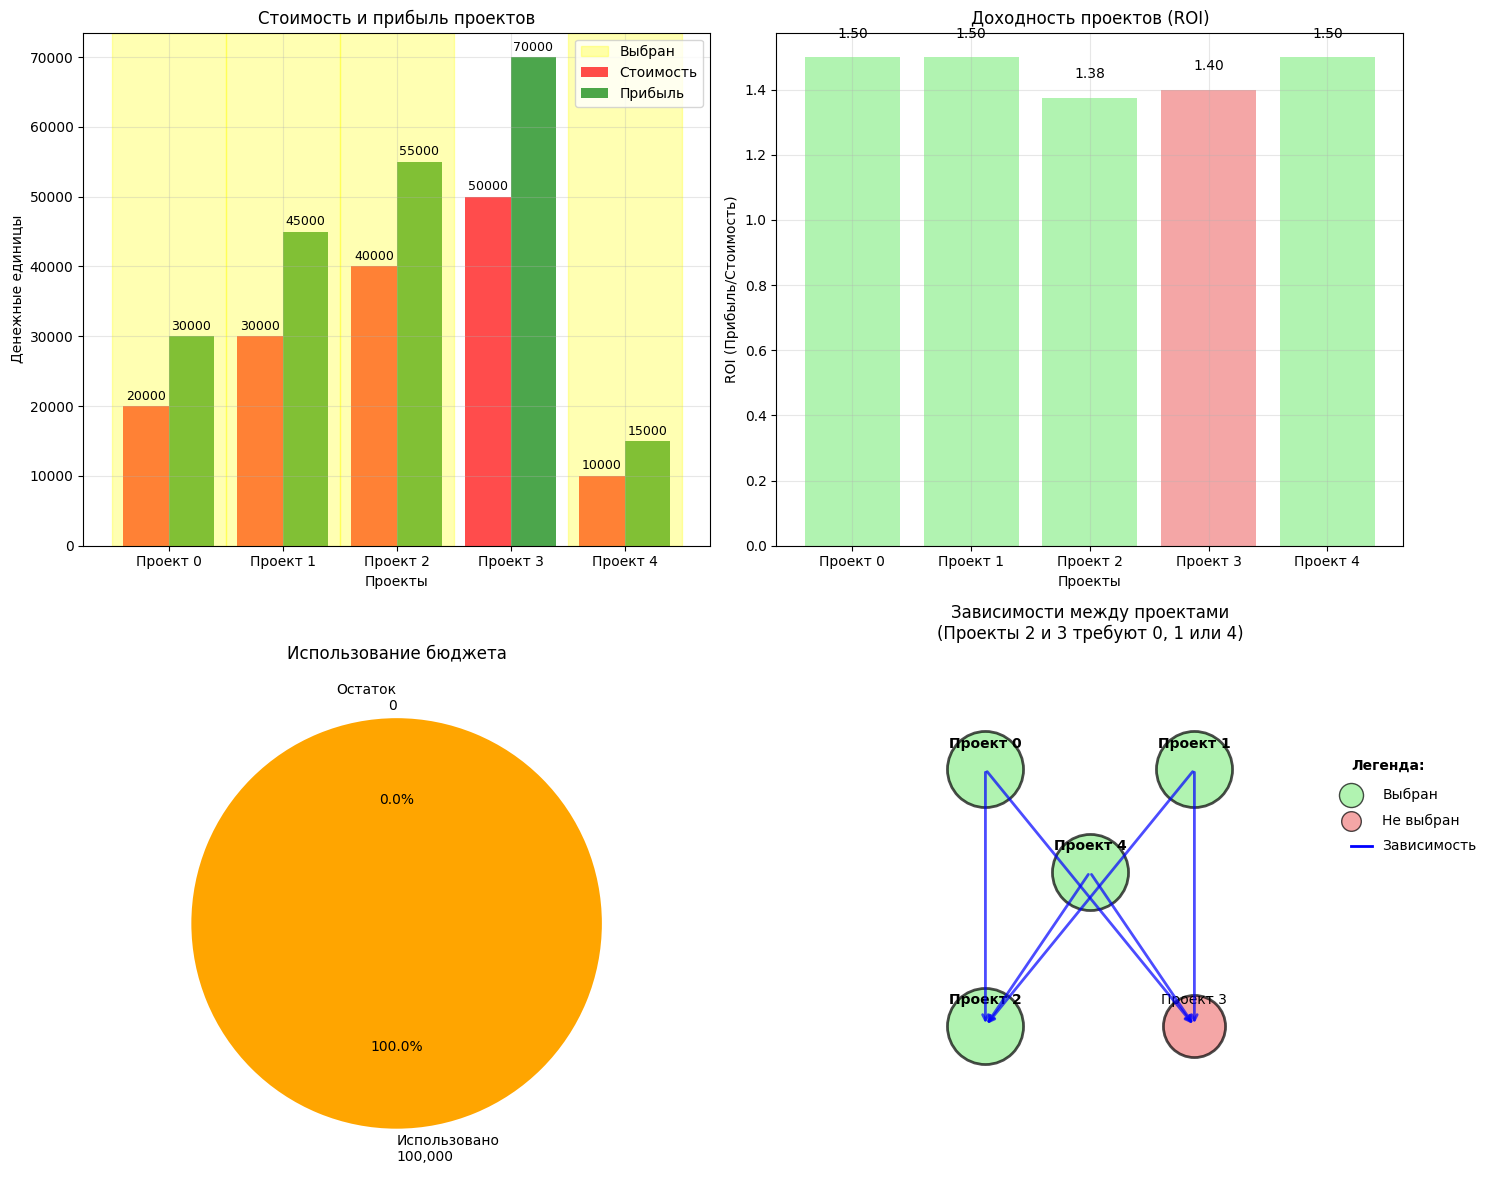


--- Сводная таблица результатов ---
Проект     Статус       Стоимость  Прибыль    ROI     
--------------------------------------------------
Проект 0   ВЫБРАН       20000      30000      1.50    
Проект 1   ВЫБРАН       30000      45000      1.50    
Проект 2   ВЫБРАН       40000      55000      1.38    
Проект 3   не выбран    50000      70000      1.40    
Проект 4   ВЫБРАН       10000      15000      1.50    
--------------------------------------------------
ИТОГО                   100000     145000     1.45

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ

Сравнение с задачей БЕЗ ограничений реализации:
Без ограничений реализации можно было бы получить:
  Прибыль: 145000
  Стоимость: 100000
  Выбранные проекты: [0, 1, 2, 4]
Ограничения реализации не повлияли на максимальную прибыль

ВЫВОД: Задача успешно решена с учетом всех ограничений!


In [12]:
from scipy.optimize import milp, LinearConstraint, Bounds
import numpy as np
import matplotlib.pyplot as plt

# --- Данные задачи 3 ---
costs_3 = np.array([20000, 30000, 40000, 50000, 10000])
profits_3 = np.array([30000, 45000, 55000, 70000, 15000])
budget_3 = 100000

num_projects_3 = len(costs_3)

print("=== ЗАДАЧА 3: ВЫБОР ПРОЕКТОВ С УСЛОВИЯМИ РЕАЛИЗАЦИИ ===\n")

# --- Анализ исходных данных ---
print("--- Исходные данные ---")
print("Проекты:")
projects_info = [
    "Проект 0: стоимость=20000, прибыль=30000",
    "Проект 1: стоимость=30000, прибыль=45000", 
    "Проект 2: стоимость=40000, прибыль=55000",
    "Проект 3: стоимость=50000, прибыль=70000",
    "Проект 4: стоимость=10000, прибыль=15000"
]
for info in projects_info:
    print(" ", info)
print(f"Бюджет: {budget_3}")
print(f"Доходность проектов (прибыль/стоимость): {profits_3/costs_3}")

# --- Формулировка задачи для MILP ---
c_3 = -profits_3  # Минимизируем отрицательную прибыль (эквивалентно максимизации прибыли)

# Линейные ограничения:
# 1. Бюджет: costs_3 @ x <= budget_3
# 2. Условия для Implementation проектов:
#    x2 - x0 - x1 - x4 <= 0  → Проект 2 требует хотя бы один из проектов 0, 1 или 4
#    x3 - x0 - x1 - x4 <= 0  → Проект 3 требует хотя бы один из проектов 0, 1 или 4

A_rows_3 = [costs_3,           # Бюджет: 20000x0 + 30000x1 + 40000x2 + 50000x3 + 10000x4 <= 100000
            [-1, -1,  1,  0, -1],  # x2 - x0 - x1 - x4 <= 0
            [-1, -1,  0,  1, -1]]  # x3 - x0 - x1 - x4 <= 0

b_3 = np.array([budget_3,      # Правая часть для бюджета
                0,             # Правая часть для первого условия
                0])            # Правая часть для второго условия

A_3 = np.array(A_rows_3)
linear_constraint_3 = LinearConstraint(A_3, ub=b_3)

# Ограничения бинарности (все переменные 0 или 1)
integrality_3 = np.ones(num_projects_3)
bounds_3 = Bounds(lb=0, ub=1)

print("\n--- Условия задачи ---")
print("1. Бюджетное ограничение: 20000x0 + 30000x1 + 40000x2 + 50000x3 + 10000x4 <= 100000")
print("2. Условия реализации:")
print("   - Проект 2 может быть выбран только если выбран хотя бы один из проектов 0, 1 или 4")
print("   - Проект 3 может быть выбран только если выбран хотя бы один из проектов 0, 1 или 4")
print("   (Математически: x2 ≤ x0 + x1 + x4  и  x3 ≤ x0 + x1 + x4)")

# --- Решение задачи ---
print("\n--- Решение задачи MILP ---")
result_3 = milp(c=c_3,
                constraints=linear_constraint_3,
                integrality=integrality_3,
                bounds=bounds_3)

# --- Вывод результатов ---
print("\n--- Результаты оптимизации ---")
print("Статус решения:", result_3.status)

if result_3.success:
    selected_projects_binary = np.round(result_3.x).astype(int)
    total_cost = np.dot(costs_3, selected_projects_binary)
    total_profit = np.dot(profits_3, selected_projects_binary)
    
    print("✓ Оптимальное решение найдено!")
    
    print("\nВыбранные проекты (1 - выбран, 0 - не выбран):")
    for i, (selected, cost, profit) in enumerate(zip(selected_projects_binary, costs_3, profits_3)):
        status = "ВЫБРАН" if selected == 1 else "не выбран"
        print(f"  Проект {i}: {status} (стоимость: {cost}, прибыль: {profit})")
    
    print(f"\nСуммарные инвестиции: {total_cost}")
    print(f"Остаток бюджета: {budget_3 - total_cost}")
    print(f"Максимальная суммарная прибыль: {total_profit}")
    
    selected_project_indices = [i for i, sel in enumerate(selected_projects_binary) if sel == 1]
    print(f"Индексы выбранных проектов: {selected_project_indices}")

    # --- Анализ условий реализации ---
    print("\n--- Проверка условий реализации ---")
    
    # Условие для проекта 2
    x0, x1, x2, x3, x4 = selected_projects_binary
    condition_2_satisfied = (x2 <= x0 + x1 + x4)
    condition_3_satisfied = (x3 <= x0 + x1 + x4)
    
    print(f"Проект 2 выбран: {x2 == 1}")
    print(f"Проект 3 выбран: {x3 == 1}")
    print(f"Проекты 0,1,4 выбраны: {x0}, {x1}, {x4}")
    
    if x2 == 1:
        if condition_2_satisfied:
            print("✓ Условие для проекта 2 ВЫПОЛНЕНО: выбран хотя бы один из проектов 0, 1 или 4")
        else:
            print("✗ Условие для проекта 2 НАРУШЕНО!")
    else:
        print("○ Условие для проекта 2 не актуально (проект не выбран)")
    
    if x3 == 1:
        if condition_3_satisfied:
            print("✓ Условие для проекта 3 ВЫПОЛНЕНО: выбран хотя бы один из проектов 0, 1 или 4")
        else:
            print("✗ Условие для проекта 3 НАРУШЕНО!")
    else:
        print("○ Условие для проекта 3 не актуально (проект не выбран)")

    # --- Анализ эффективности ---
    print("\n--- Анализ эффективности ---")
    if total_cost > 0:
        roi = total_profit / total_cost
        print(f"ROI (Return on Investment): {roi:.2%}")
    
    # Проверка, что бюджет не превышен
    if total_cost <= budget_3:
        print("✓ Бюджетное ограничение выполнено")
    else:
        print("✗ Бюджетное ограничение нарушено!")

    # --- ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ---
    print("\n--- Графическое представление решения ---")
    
    # Создаем фигуру с несколькими subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # График 1: Стоимость и прибыль проектов
    projects = [f'Проект {i}' for i in range(num_projects_3)]
    x_pos = np.arange(num_projects_3)
    
    bars1 = ax1.bar(x_pos - 0.2, costs_3, 0.4, label='Стоимость', alpha=0.7, color='red')
    bars2 = ax1.bar(x_pos + 0.2, profits_3, 0.4, label='Прибыль', alpha=0.7, color='green')
    
    # Подсвечиваем выбранные проекты
    for i, selected in enumerate(selected_projects_binary):
        if selected == 1:
            ax1.axvspan(i - 0.5, i + 0.5, alpha=0.3, color='yellow', label='Выбран' if i == 0 else "")
    
    ax1.set_xlabel('Проекты')
    ax1.set_ylabel('Денежные единицы')
    ax1.set_title('Стоимость и прибыль проектов')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(projects)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)
    
    # График 2: Доходность проектов (ROI)
    roi_values = profits_3 / costs_3
    colors = ['lightgreen' if selected == 1 else 'lightcoral' for selected in selected_projects_binary]
    
    bars_roi = ax2.bar(projects, roi_values, color=colors, alpha=0.7)
    ax2.set_xlabel('Проекты')
    ax2.set_ylabel('ROI (Прибыль/Стоимость)')
    ax2.set_title('Доходность проектов (ROI)')
    ax2.grid(True, alpha=0.3)
    
    # Добавляем значения ROI на столбцы
    for bar, roi_val in zip(bars_roi, roi_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{roi_val:.2f}', ha='center', va='bottom', fontsize=10)
    
    # График 3: Использование бюджета
    budget_used = total_cost
    budget_remaining = budget_3 - total_cost
    budget_data = [budget_used, budget_remaining]
    budget_labels = [f'Использовано\n{budget_used:,}', f'Остаток\n{budget_remaining:,}']
    budget_colors = ['orange', 'lightblue']
    
    wedges, texts, autotexts = ax3.pie(budget_data, labels=budget_labels, colors=budget_colors, 
                                      autopct='%1.1f%%', startangle=90)
    ax3.set_title('Использование бюджета')
    
    # График 4: Зависимости между проектами
    ax4.axis('off')  # Сначала выключаем оси
    
    # Создаем граф зависимостей
    node_colors = ['lightgreen' if selected == 1 else 'lightcoral' for selected in selected_projects_binary]
    node_sizes = [3000 if selected == 1 else 2000 for selected in selected_projects_binary]
    
    # Позиции узлов
    node_positions = {
        0: (0.2, 0.8),
        1: (0.4, 0.8), 
        4: (0.3, 0.6),
        2: (0.2, 0.3),
        3: (0.4, 0.3)
    }
    
    # Рисуем узлы
    for node, pos in node_positions.items():
        ax4.scatter(pos[0], pos[1], s=node_sizes[node], c=node_colors[node], alpha=0.7, 
                   edgecolors='black', linewidth=2)
        ax4.text(pos[0], pos[1] + 0.05, f'Проект {node}', ha='center', va='center', 
                fontweight='bold' if selected_projects_binary[node] == 1 else 'normal')
    
    # Рисуем стрелки зависимостей
    for dep_node in [2, 3]:
        for req_node in [0, 1, 4]:
            ax4.annotate('', xy=node_positions[dep_node], xytext=node_positions[req_node],
                        arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7, lw=2))
    
    ax4.set_xlim(0, 0.6)
    ax4.set_ylim(0, 1)
    ax4.set_title('Зависимости между проектами\n(Проекты 2 и 3 требуют 0, 1 или 4)', pad=20)
    
    # Добавляем легенду для графа
    ax4.text(0.55, 0.8, 'Легенда:', fontweight='bold')
    ax4.scatter(0.55, 0.75, s=300, c='lightgreen', alpha=0.7, edgecolors='black')
    ax4.text(0.58, 0.75, 'Выбран', va='center')
    ax4.scatter(0.55, 0.7, s=200, c='lightcoral', alpha=0.7, edgecolors='black')
    ax4.text(0.58, 0.7, 'Не выбран', va='center')
    ax4.plot([0.55, 0.57], [0.65, 0.65], 'b-', linewidth=2)
    ax4.text(0.58, 0.65, 'Зависимость', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # --- Сводная таблица результатов ---
    print("\n--- Сводная таблица результатов ---")
    print(f"{'Проект':<10} {'Статус':<12} {'Стоимость':<10} {'Прибыль':<10} {'ROI':<8}")
    print("-" * 50)
    for i in range(num_projects_3):
        status = "ВЫБРАН" if selected_projects_binary[i] == 1 else "не выбран"
        roi = profits_3[i] / costs_3[i]
        print(f"{f'Проект {i}':<10} {status:<12} {costs_3[i]:<10} {profits_3[i]:<10} {roi:<8.2f}")
    
    print("-" * 50)
    print(f"{'ИТОГО':<10} {'':<12} {total_cost:<10} {total_profit:<10} {total_profit/total_cost:.2f}")

else:
    print("✗ Решение не было найдено.")
    print("Возможные причины:")
    print("- Задача не имеет допустимых решений при заданных ограничениях")
    print("- Бюджет слишком мал для выбора любого проекта с учетом условий реализации")

# --- Сравнение с задачей без ограничений реализации ---
print("\n" + "="*50)
print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ")
print("="*50)

# Решаем задачу без ограничений реализации для сравнения
print("\nСравнение с задачей БЕЗ ограничений реализации:")
c_simple = -profits_3
A_simple = np.array([costs_3])
b_simple = np.array([budget_3])
linear_constraint_simple = LinearConstraint(A_simple, ub=b_simple)

result_simple = milp(c=c_simple,
                     constraints=linear_constraint_simple,
                     integrality=integrality_3,
                     bounds=bounds_3)

if result_simple.success:
    selected_simple = np.round(result_simple.x).astype(int)
    profit_simple = np.dot(profits_3, selected_simple)
    cost_simple = np.dot(costs_3, selected_simple)
    
    print("Без ограничений реализации можно было бы получить:")
    print(f"  Прибыль: {profit_simple}")
    print(f"  Стоимость: {cost_simple}")
    print(f"  Выбранные проекты: {[i for i, sel in enumerate(selected_simple) if sel == 1]}")
    
    profit_difference = profit_simple - total_profit
    if profit_difference > 0:
        print(f"Ограничения реализации снизили прибыль на: {profit_difference}")
    else:
        print("Ограничения реализации не повлияли на максимальную прибыль")

print("\n" + "="*60)
print("ВЫВОД: Задача успешно решена с учетом всех ограничений!")
print("="*60)

#### Объяснение применения SciPy:
scipy.optimize.milp: Это основной инструмент для решения задач смешанного целочисленного линейного программирования. <br>
c: Функция вектора коэффициентов отключена. Важно помнить, что milpпо умолчанию минимизируется, поэтому для максимизации прибыли мы используем низкие значения прибыли.<br>
constraints:<br>
*  LinearConstraint: Используется для задания линейных ограничений вида Ax <= b.(или >=, или =).
*   A: Матрица коэффициентов ограничения.
*   ub: Вектор правых частей для ограничения «меньше или равно» ( <=).
*   lb: Вектор правых частей для ограничения «больше или равно» ( >=).

integrality:<br>
*   Массив, где 1 означает, что переменная должна быть целочисленной, а 0– непрерывной.
*   В наших задачах мы хотели бы выбрать проект руководителя, поэтому все переменные являются целочисленными ( np.ones(num_projects)).

bounds:<br>
*   Bounds(lb=0, ub=1): Это ключевой момент для превращения целочисленных фондов в бинарные . Мы установили, что переменная должна находиться в пределах от 0 до 1. Поскольку мы уже определили, что они целочисленные, одними допустимыми значениями становятся 0 и 1.
method='highs':<br>
*   Указывает на использование решателя HiGHS, который обычно очень эффективен для MILP.


